In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import csv

import warnings
import seaborn as sns
import pickle

from keras.layers import Dense,Embedding,Input,GlobalMaxPool1D,LSTM,Dropout,Flatten
from keras import Sequential,utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence

from nltk.corpus import stopwords
stop = stopwords.words('english')
from textblob import Word, TextBlob
import gensim
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser, Phrases
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC

warnings.filterwarnings("ignore")
%matplotlib inline 

Using TensorFlow backend.


In [3]:
data=pd.read_csv("model_data.csv")

In [4]:
data.head(5)

,business_id,date,review_id,stars,text,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,...,average_compliment_more,average_compliment_note,average_compliment_photos,average_compliment_plain,average_compliment_profile,average_compliment_writer,friend_count,split_text,bigram_text,trigram_text
0,NZnhc2sEQy3RmzKTZnqtwQ,2017-01-14 21:30:33,GJXCdrto3ASJOqKeVWPi6Q,5.0,i adore travis at the hard rocks new kelly car...,yXQM5uF2jS6es16SJzNHfg,3.97,10,1,10,...,0.04,0.12,0.02,0.21,0.02,0.04,52,"['i', 'adore', 'travis', 'at', 'the', 'hard', ...","['i', 'adore', 'travis', 'at', 'the', 'hard', ...","['adore', 'travis', 'hard', 'rocks', 'new', 'k..."
1,WTqjgwHlXbSFevF32_DJVw,2016-11-09 20:09:03,2TzJjDVDEuAW6MR5Vuc1ug,5.0,i have to say that this office really has it t...,n6-Gk65cPZL6Uz8qRm3NYw,4.27,0,0,0,...,0.00,0.50,0.00,0.50,0.00,0.00,2,"['i', 'have', 'to', 'say', 'that', 'this', 'of...","['i', 'have', 'to', 'say', 'that', 'this', 'of...","['say', 'office', 'really', 'together', 'organ..."
2,ikCg8xy5JIg_NGPx-MSIDA,2018-01-09 20:56:38,yi0R0Ugj_xUx_Nek0-_Qig,5.0,went in for a lunch steak sandwich was delicio...,dacAIZ6fTM6mqwW5uxkskg,4.00,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,23,"['went', 'in', 'for', 'a', 'lunch', 'steak', '...","['went', 'in', 'for', 'a', 'lunch', 'steak', '...","['went', 'lunch', 'steak', 'sandwich', 'delici..."
3,b1b1eb3uo-w561D0ZfCEiQ,2018-01-30 23:07:38,11a8sVPMUFtaC7_ABRkmtw,1.0,today was my second out of three sessions i ha...,ssoyf2_x0EQMed6fgHeMyQ,2.00,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,335,"['today', 'was', 'my', 'second', 'out', 'of', ...","['today', 'was', 'my', 'second', 'out', 'of', ...","['today', 'second', 'three', 'sessions', 'paid..."
4,eU_713ec6fTGNO4BegRaww,2013-01-20 13:25:59,fdiNeiN_hoCxCMy2wTRW9g,4.0,ill be the first to admit that i was not excit...,w31MKYsNFMrjhWxxAb5wIw,4.00,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1,"['ill', 'be', 'the', 'first', 'to', 'admit', '...","['ill', 'be', 'the', 'first', 'to', 'admit', '...","['ill', 'first', 'admit', 'excited', 'going', ..."


In [5]:
X_train,X_test,y_train,y_test=train_test_split(data.drop("stars",axis=1),data["stars"],test_size=0.2)

# Text Classifiers

In [6]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2), lowercase=False, max_features = 50000)
tf_transformer = tf.fit(data["trigram_text"])

In [7]:
pickle.dump(tf_transformer, open("./models/tfidf1.pkl", "wb"))

In [8]:
train_prepared = tf_transformer.transform(X_train["trigram_text"])
test_prepared = tf_transformer.transform(X_test["trigram_text"])

In [9]:
print(train_prepared.shape)

(319999, 50000)


## Naive Bayes Model

In [200]:
nb_clf = MultinomialNB()
nb_clf.fit(train_prepared, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [201]:
filename = './models/nb_clf_text.sav'
pickle.dump(nb_clf, open(filename, 'wb'))

In [202]:
nb_proba=nb_clf.predict_proba(test_prepared)
nb_proba

array([[1.11511516e-01, 3.62163267e-02, 4.37224982e-02, 1.56464837e-01,
        6.52084823e-01],
       [5.42114413e-03, 7.97387946e-02, 2.39847442e-01, 4.76888931e-01,
        1.98103688e-01],
       [1.74239012e-03, 5.66955305e-04, 8.40609581e-04, 4.55194995e-03,
        9.92298095e-01],
       ...,
       [3.44429762e-05, 3.22210876e-03, 9.77249500e-02, 8.48332115e-01,
        5.06863834e-02],
       [5.32907798e-01, 1.02116846e-01, 9.88031982e-02, 7.87534928e-02,
        1.87418665e-01],
       [3.03510431e-02, 2.95126863e-02, 3.78965003e-02, 1.63305804e-01,
        7.38933966e-01]])

In [203]:
nb_predictions = nb_clf.predict(test_prepared)
np.mean(nb_predictions == y_test)

0.644625

In [204]:
print(metrics.classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

         1.0       0.67      0.79      0.73     11597
         2.0       0.43      0.17      0.25      6463
         3.0       0.46      0.23      0.31      8905
         4.0       0.47      0.57      0.52     17703
         5.0       0.77      0.83      0.79     35332

   micro avg       0.64      0.64      0.64     80000
   macro avg       0.56      0.52      0.52     80000
weighted avg       0.63      0.64      0.62     80000



## Logistic Regression

In [10]:
lr_clf = LogisticRegression()
lr_clf.fit(train_prepared, y_train)
filename = './models/lr_clf_text.sav'
pickle.dump(lr_clf, open(filename, 'wb'))

In [18]:
lr_predictions = lr_clf.predict(test_prepared)
np.mean(lr_predictions == y_test)

0.6875

In [207]:
print(metrics.classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

         1.0       0.74      0.85      0.79     11597
         2.0       0.52      0.27      0.36      6463
         3.0       0.52      0.35      0.42      8905
         4.0       0.54      0.49      0.51     17703
         5.0       0.76      0.89      0.82     35332

   micro avg       0.69      0.69      0.69     80000
   macro avg       0.62      0.57      0.58     80000
weighted avg       0.66      0.69      0.67     80000



## Random Forest

In [208]:
rf_clf = RandomForestClassifier(max_depth=3)
rf_clf.fit(train_prepared, y_train)
filename = './models/rf_clf_text.sav'
pickle.dump(rf_clf, open(filename, 'wb'))

In [209]:
rf_predictions = rf_clf.predict(test_prepared)
np.mean(rf_predictions == y_test)

0.4422875

In [210]:
print(metrics.classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

         1.0       0.81      0.00      0.01     11597
         2.0       0.00      0.00      0.00      6463
         3.0       0.00      0.00      0.00      8905
         4.0       0.00      0.00      0.00     17703
         5.0       0.44      1.00      0.61     35332

   micro avg       0.44      0.44      0.44     80000
   macro avg       0.25      0.20      0.12     80000
weighted avg       0.31      0.44      0.27     80000



## Linear SVC

In [211]:
svc_clf=LinearSVC()
svc_clf.fit(train_prepared, y_train)
filename = './models/svc_clf_text.sav'
pickle.dump(svc_clf, open(filename, 'wb'))

In [212]:
svc_predictions = svc_clf.predict(test_prepared)
np.mean(svc_predictions == y_test)

0.6670875

In [213]:
print(metrics.classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

         1.0       0.74      0.82      0.78     11597
         2.0       0.44      0.32      0.37      6463
         3.0       0.46      0.35      0.40      8905
         4.0       0.51      0.47      0.49     17703
         5.0       0.77      0.86      0.81     35332

   micro avg       0.67      0.67      0.67     80000
   macro avg       0.58      0.56      0.57     80000
weighted avg       0.65      0.67      0.65     80000



## Model Evaluation

In [214]:
models=[nb_clf,lr_clf,rf_clf,svc_clf]
cv=10
text_cv_df=pd.DataFrame(index=range(cv*len(models)))
entries=[]
for model in models:
    model_name=model.__class__.__name__
    accuracies=cross_val_score(model,train_prepared,y_train,cv=cv,scoring="accuracy")
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    print("{} accuracy: {:.4}% (+/- {:.4}%)".format(model_name, accuracies.mean()*100, accuracies.std()*100))
test_cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

MultinomialNB accuracy: 64.62% (+/- 0.2514%)
LogisticRegression accuracy: 68.65% (+/- 0.2543%)
RandomForestClassifier accuracy: 44.19% (+/- 0.04548%)
LinearSVC accuracy: 66.64% (+/- 0.1989%)


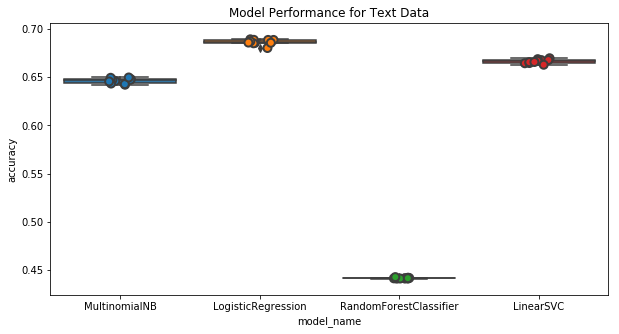

In [215]:
plt.figure(figsize=(10,5))
sns.boxplot(x='model_name', y='accuracy', data=test_cv_df)
sns.stripplot(x='model_name', y='accuracy', data=test_cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title("Model Performance for Text Data")
plt.savefig("./images/MP_Text.png")
plt.show()

# Numerical Classifier

In [11]:
num_train=X_train[["non_stop_percent","polarity","subjectivity"]]
num_test=X_test[["non_stop_percent","polarity","subjectivity"]]

In [12]:
num_pipe=Pipeline([('scaler', StandardScaler())])

In [13]:
num_train = num_pipe.fit_transform(num_train)
num_test = num_pipe.fit_transform(num_test)

## Naive Bayes

In [79]:
nb_clf_2 = GaussianNB()
nb_clf_2.fit(num_train, y_train)
filename = './models/nb_clf_num.sav'
pickle.dump(nb_clf_2, open(filename, 'wb'))

In [27]:
nb_predictions_2 = nb_clf_2.predict(num_test)
np.mean(nb_predictions_2 == y_test)

0.5022625

In [28]:
print(metrics.classification_report(y_test, nb_predictions_2))

              precision    recall  f1-score   support

         1.0       0.50      0.64      0.56     11597
         2.0       0.14      0.11      0.12      6463
         3.0       0.23      0.00      0.00      8905
         4.0       0.35      0.04      0.07     17703
         5.0       0.54      0.89      0.67     35332

   micro avg       0.50      0.50      0.50     80000
   macro avg       0.35      0.33      0.29     80000
weighted avg       0.43      0.50      0.40     80000



## Logistic Regression

In [14]:
lr_clf_2 = LogisticRegression()
lr_clf_2.fit(num_train, y_train)
filename = './models/lr_clf_num.sav'
pickle.dump(lr_clf_2, open(filename, 'wb'))

In [15]:
lr_predictions_2 = lr_clf_2.predict(num_test)
np.mean(lr_predictions_2 == y_test)

0.53205

In [16]:
print(metrics.classification_report(y_test, lr_predictions_2))

              precision    recall  f1-score   support

         1.0       0.53      0.74      0.62     11763
         2.0       0.00      0.00      0.00      6388
         3.0       0.00      0.00      0.00      8926
         4.0       0.18      0.00      0.00     17639
         5.0       0.53      0.96      0.69     35284

   micro avg       0.53      0.53      0.53     80000
   macro avg       0.25      0.34      0.26     80000
weighted avg       0.35      0.53      0.39     80000



## Random Forest

In [81]:
rf_clf_2 = RandomForestClassifier(max_depth=10,criterion="entropy")
rf_clf_2.fit(num_train, y_train)
filename = './models/rf_clf_num.sav'
pickle.dump(rf_clf_2, open(filename, 'wb'))

In [33]:
rf_predictions_2 = rf_clf_2.predict(num_test)
np.mean(rf_predictions_2 == y_test)

0.5384

In [34]:
print(metrics.classification_report(y_test, rf_predictions_2))

              precision    recall  f1-score   support

         1.0       0.51      0.78      0.61     11597
         2.0       0.22      0.01      0.01      6463
         3.0       0.25      0.02      0.03      8905
         4.0       0.31      0.07      0.11     17703
         5.0       0.57      0.92      0.70     35332

   micro avg       0.54      0.54      0.54     80000
   macro avg       0.37      0.36      0.29     80000
weighted avg       0.44      0.54      0.43     80000



## Linear SVC

In [82]:
svc_clf_2=LinearSVC()
svc_clf_2.fit(num_train, y_train)
filename = './models/svc_clf_num.sav'
pickle.dump(svc_clf_2, open(filename, 'wb'))

In [36]:
svc_predictions_2 = svc_clf_2.predict(num_test)
np.mean(svc_predictions_2 == y_test)

0.53505

In [37]:
print(metrics.classification_report(y_test, svc_predictions_2))

              precision    recall  f1-score   support

         1.0       0.50      0.78      0.61     11597
         2.0       0.00      0.00      0.00      6463
         3.0       0.00      0.00      0.00      8905
         4.0       0.30      0.02      0.03     17703
         5.0       0.55      0.95      0.70     35332

   micro avg       0.54      0.54      0.54     80000
   macro avg       0.27      0.35      0.27     80000
weighted avg       0.38      0.54      0.40     80000



## Model Evaluation

In [38]:
models=[nb_clf_2,lr_clf_2,rf_clf_2,svc_clf_2]
cv=10
num_cv_df=pd.DataFrame(index=range(cv*len(models)))
entries=[]
for model in models:
    model_name=model.__class__.__name__
    accuracies=cross_val_score(model,num_train,y_train,cv=cv,scoring="accuracy")
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    print("{} accuracy: {:.4}% (+/- {:.4}%)".format(model_name, accuracies.mean()*100, accuracies.std()*100))
num_cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

GaussianNB accuracy: 50.08% (+/- 0.3167%)
LogisticRegression accuracy: 53.46% (+/- 0.1023%)
RandomForestClassifier accuracy: 53.74% (+/- 0.1313%)
LinearSVC accuracy: 53.45% (+/- 0.08733%)


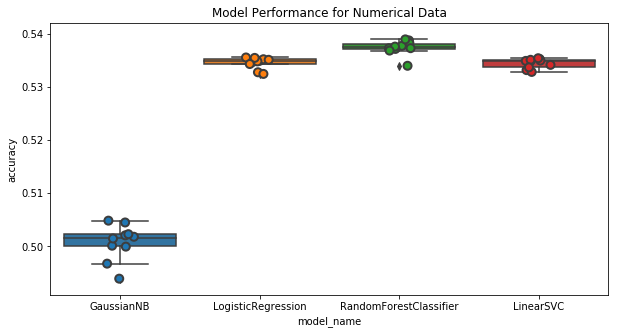

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(x='model_name', y='accuracy', data=num_cv_df)
sns.stripplot(x='model_name', y='accuracy', data=num_cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title("Model Performance for Numerical Data")
plt.savefig("./images/MP_Num.png")
plt.show()

## Combined Models

### LR Text and LR Numerical combined Model

In [19]:
np.mean(lr_predictions==lr_predictions_2)

0.6191

In [24]:
def get_label(data_1,data_2,w1,w2):
    prediction_1 = lr_clf.predict(data_1)
    prediction_2 = lr_clf_2.predict(data_2)
    return w1*prediction_1+w2*prediction_2

In [25]:
weighted_labels_list = []
for weight in np.linspace(0, 1, 1000):
    ylabels_1 = get_label(test_prepared,num_test, w1=weight, w2=1-weight)
    score = np.mean(y_test==ylabels_1)
    lst = [weight, 1-weight, score]
    weighted_labels_list.append(lst)

In [26]:
weighted_labels_list = sorted(weighted_labels_list, key = lambda x: x[2],reverse=True)

In [27]:
weighted_labels_list

[[1.0, 0.0, 0.6875],
 [0.0, 1.0, 0.53205],
 [0.6666666666666666, 0.33333333333333337, 0.491175],
 [0.3333333333333333, 0.6666666666666667, 0.4818625],
 [0.001001001001001001, 0.998998998998999, 0.4795625],
 [0.002002002002002002, 0.997997997997998, 0.4795625],
 [0.003003003003003003, 0.996996996996997, 0.4795625],
 [0.004004004004004004, 0.995995995995996, 0.4795625],
 [0.005005005005005005, 0.994994994994995, 0.4795625],
 [0.006006006006006006, 0.993993993993994, 0.4795625],
 [0.007007007007007007, 0.992992992992993, 0.4795625],
 [0.008008008008008008, 0.991991991991992, 0.4795625],
 [0.009009009009009009, 0.990990990990991, 0.4795625],
 [0.01001001001001001, 0.98998998998999, 0.4795625],
 [0.011011011011011011, 0.988988988988989, 0.4795625],
 [0.012012012012012012, 0.987987987987988, 0.4795625],
 [0.013013013013013013, 0.986986986986987, 0.4795625],
 [0.014014014014014014, 0.985985985985986, 0.4795625],
 [0.015015015015015015, 0.984984984984985, 0.4795625],
 [0.016016016016016016, 0.

### LR and SVC Text Combined Model

In [221]:
np.mean(lr_predictions==svc_predictions)

0.8723125

In [20]:
def get_label(data_1,data_2,w1,w2):
    prediction_1 = lr_clf.predict(data_1)
    prediction_2 = svc_clf.predict(data_2)
    return w1*prediction_1+w2*prediction_2

In [ ]:
weighted_labels_list = []
for weight in np.linspace(0, 1, 1000):
    ylabels_1 = get_label(test_prepared,test_prepared, w1=weight, w2=1-weight)
    score = np.mean(y_test==ylabels_1)
    lst = [weight, 1-weight, score]
    weighted_labels_list.append(lst)

In [22]:
weighted_labels_list = sorted(weighted_labels_list, key = lambda x: x[2],reverse=True)

In [227]:
weighted_labels_list

[[1.0, 0.0, 0.6860625],
 [0.0, 1.0, 0.6670875],
 [0.6666666666666666, 0.33333333333333337, 0.6289875],
 [0.3333333333333333, 0.6666666666666667, 0.628325],
 [0.001001001001001001, 0.998998998998999, 0.627125],
 [0.004004004004004004, 0.995995995995996, 0.627125],
 [0.005005005005005005, 0.994994994994995, 0.627125],
 [0.006006006006006006, 0.993993993993994, 0.627125],
 [0.009009009009009009, 0.990990990990991, 0.627125],
 [0.01001001001001001, 0.98998998998999, 0.627125],
 [0.011011011011011011, 0.988988988988989, 0.627125],
 [0.014014014014014014, 0.985985985985986, 0.627125],
 [0.015015015015015015, 0.984984984984985, 0.627125],
 [0.016016016016016016, 0.983983983983984, 0.627125],
 [0.01901901901901902, 0.980980980980981, 0.627125],
 [0.02002002002002002, 0.97997997997998, 0.627125],
 [0.02102102102102102, 0.978978978978979, 0.627125],
 [0.024024024024024024, 0.975975975975976, 0.627125],
 [0.025025025025025023, 0.974974974974975, 0.627125],
 [0.026026026026026026, 0.97397397397397